In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data = pd.read_csv('/content/sales-of-shampoo-over-a-three-ye.csv', index_col=[0], parse_dates=True, squeeze=True)

In [3]:
type(data)

pandas.core.series.Series

In [4]:
data.head()

Month
1-01    266.0
1-02    145.9
1-03    183.1
1-04    119.3
1-05    180.3
Name: Sales of shampoo over a three year period, dtype: float64

In [5]:
data.tail()

Month
3-09                                         682.0
3-10                                         475.3
3-11                                         581.3
3-12                                         646.9
Sales of shampoo over a three year period      NaN
Name: Sales of shampoo over a three year period, dtype: float64

In [6]:
data=data[:36]

In [7]:
data.tail()

Month
3-08    407.6
3-09    682.0
3-10    475.3
3-11    581.3
3-12    646.9
Name: Sales of shampoo over a three year period, dtype: float64

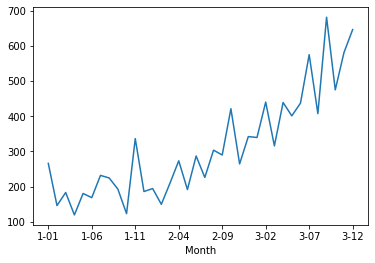

In [8]:
data.plot()

In [9]:
data.size


36

In [10]:
data.describe()

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales of shampoo over a three year period, dtype: float64

In [11]:
#We are smoothing the data
data_ma = data.rolling(window=10).mean()

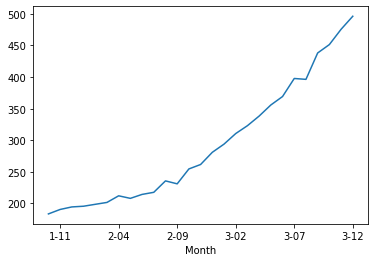

In [12]:
data_ma.plot()

In [13]:
#Baseline (Naive) Model
 

In [14]:
data_base = pd.concat([data, data.shift(1)], axis=1)

In [15]:
data_base.head()

,Sales of shampoo over a three year period,Sales of shampoo over a three year period
Month,,
1-01,266.0,NaN
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3


In [16]:
data_base.columns=['Actual_Sales', 'Forecast_Sales']

In [17]:
data_base.head()

,Actual_Sales,Forecast_Sales
Month,,
1-01,266.0,NaN
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3


In [18]:
data_base.dropna(inplace=True)

In [19]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [20]:
data_error = mean_squared_error(data_base.Actual_Sales, data_base.Forecast_Sales)

In [21]:
data_error

11715.388285714285

In [22]:
np.sqrt(data_error)

108.23764726616282

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


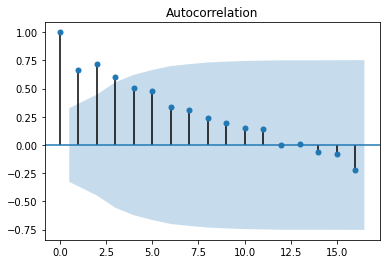

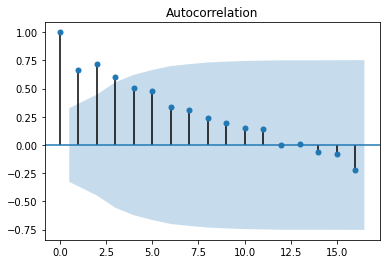

In [24]:
plot_acf(data)

#Q=3 based on the graph above

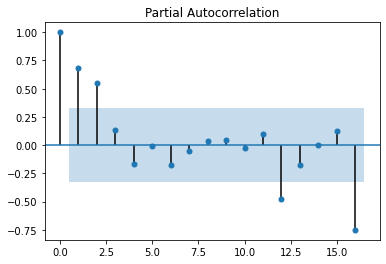

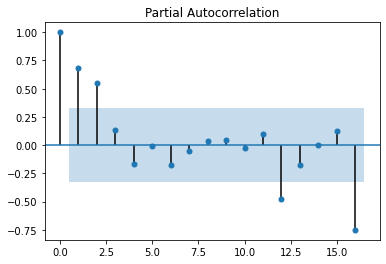

In [25]:
plot_pacf(data)

P=2

In [26]:
from statsmodels.tsa.arima_model import ARIMA

In [27]:
train= data[0:25]
test= data[25:36]

In [28]:
model= ARIMA(train, order= (3,1,2))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [29]:
model_fit= model.fit()

In [30]:
model_fit.aic

272.38919480712286

In [31]:
data_forecast= model_fit.forecast(steps=11)[0]

In [32]:
data_forecast

array([411.99808685, 364.11848926, 359.3947626 , 351.27889823,
       406.97150833, 418.33290706, 411.19332431, 385.83423317,
       405.32980473, 435.87741384, 454.17127706])

In [33]:
#Error
np.sqrt(mean_squared_error(test, data_forecast))

130.92712338984404

If we compare it with the base model we can see that base model error rate is better then this model

In [34]:
p_values= range(0,5)
d_values = range(0,5)
q_values = range(0,5)

In [35]:
import warnings
warnings.filterwarnings("ignore")

In [36]:
for p in p_values:
    for d in d_values:
        for q in q_values:
            order=(p,d,q)
            train, test = data[0:25], data[25:36]
            prediction= list()
            
            for i in range(len(test)):
                try:
                  
                  model= ARIMA(train, order)
                  model_fit = model.fit(disp=0)
                  pred_y = model_fit.forecast()[0]
                  prediction.append(pred_y)
                  error = mean_squared_error(test, prediction)
                  print('ARIMA%s MSE = %.2f'% (order, error))
                except:
                  continue

ARIMA(0, 0, 0) MSE = 77950.15
ARIMA(0, 0, 1) MSE = 70119.33
ARIMA(0, 0, 2) MSE = 58566.55
ARIMA(0, 0, 3) MSE = 62031.18
ARIMA(0, 0, 4) MSE = 30922.39
ARIMA(0, 1, 0) MSE = 33849.87
ARIMA(0, 1, 1) MSE = 40654.43
ARIMA(0, 1, 2) MSE = 34511.79
ARIMA(0, 2, 0) MSE = 34017.03
ARIMA(0, 2, 1) MSE = 28393.09
ARIMA(1, 0, 0) MSE = 61158.54
ARIMA(1, 0, 1) MSE = 46528.85
ARIMA(1, 0, 2) MSE = 43922.42
ARIMA(1, 0, 4) MSE = 25186.17
ARIMA(1, 1, 0) MSE = 31687.09
ARIMA(1, 1, 1) MSE = 42176.68
ARIMA(1, 2, 0) MSE = 18845.80
ARIMA(1, 2, 1) MSE = 26129.54
ARIMA(2, 0, 0) MSE = 45248.66
ARIMA(2, 0, 1) MSE = 32171.85
ARIMA(2, 0, 4) MSE = 28995.71
ARIMA(2, 1, 0) MSE = 35488.35
ARIMA(2, 1, 1) MSE = 39633.99
ARIMA(2, 1, 2) MSE = 35884.79
ARIMA(2, 2, 0) MSE = 34024.24
ARIMA(3, 0, 0) MSE = 46326.54
ARIMA(3, 0, 4) MSE = 43204.64
ARIMA(3, 1, 0) MSE = 22024.86
ARIMA(3, 1, 1) MSE = 22841.63
ARIMA(3, 1, 2) MSE = 18095.37
ARIMA(3, 1, 4) MSE = 37611.19
ARIMA(3, 2, 0) MSE = 24695.26
ARIMA(3, 2, 1) MSE = 16368.68
ARIMA(3, 2